In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence  import variance_inflation_factor



pd.options.display.float_format = '{:.2f}'.format 
pd.pandas.set_option('display.max_columns',None)

In [390]:
df = pd.read_csv('day.csv',dtype='unicode')

## Steps to be followed
- Reading , understanding and visualizing data
- Preparing the data for modeling(train-test split , rescaling)
- Training the model
- Residual analysis
- Predication and evaluation on the test set

In [391]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2,10.6061,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.4635,43.6957,12.5223,82,1518,1600


### Requirements
1. The model should be built taking this 'cnt' as the target variable.

## Step - 1: Reading , understanding and visualizing data

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     730 non-null    object
 1   dteday      730 non-null    object
 2   season      730 non-null    object
 3   yr          730 non-null    object
 4   mnth        730 non-null    object
 5   holiday     730 non-null    object
 6   weekday     730 non-null    object
 7   workingday  730 non-null    object
 8   weathersit  730 non-null    object
 9   temp        730 non-null    object
 10  atemp       730 non-null    object
 11  hum         730 non-null    object
 12  windspeed   730 non-null    object
 13  casual      730 non-null    object
 14  registered  730 non-null    object
 15  cnt         730 non-null    object
dtypes: object(16)
memory usage: 91.4+ KB


In [393]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [394]:
cols = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']
df[cols] = df[cols].apply(pd.to_numeric)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    object 
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    object 
 14  registered  730 non-null    object 
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


In [396]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,4508.01
std,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,1936.01
min,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,22.00
25%,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,3169.75
50%,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,4548.50
75%,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,5966.00
max,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,8714.00


In [397]:
## Duplicate checks
df[df.duplicated(subset=None, keep='first')]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [398]:
## Null and na checks 
print(df.isnull().all(axis=0).sum())

0


### Data understaning by visualization

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    object 
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    object 
 14  registered  730 non-null    object 
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


In [400]:
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy_mist',
    3: 'Light_Rain_Thunder',
    4: 'Heavy_Rain_thunder'
})

In [401]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Cloudy_mist,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Cloudy_mist,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear,9.31,11.46,43.70,12.52,82,1518,1600


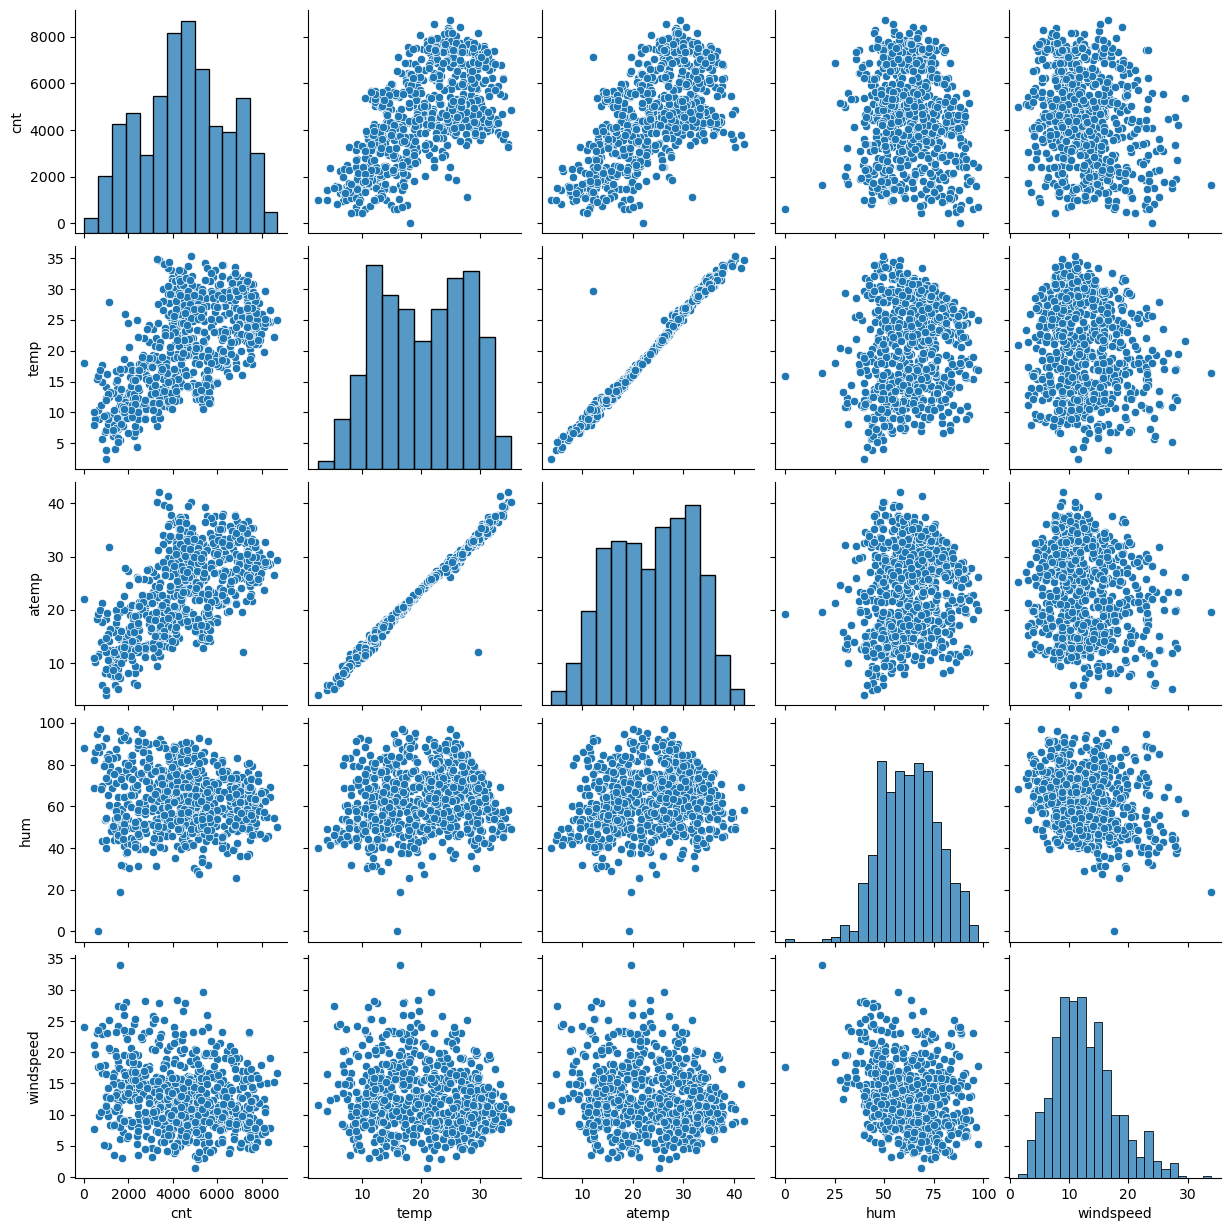

In [402]:
projection = df[['cnt','temp', 'atemp', 'hum', 'windspeed']]
sns.pairplot(projection)
plt.show()

### observation
1. CNT , atemp and temp has some sort of positive correlation

In [37]:
## Visualization of categorical variables

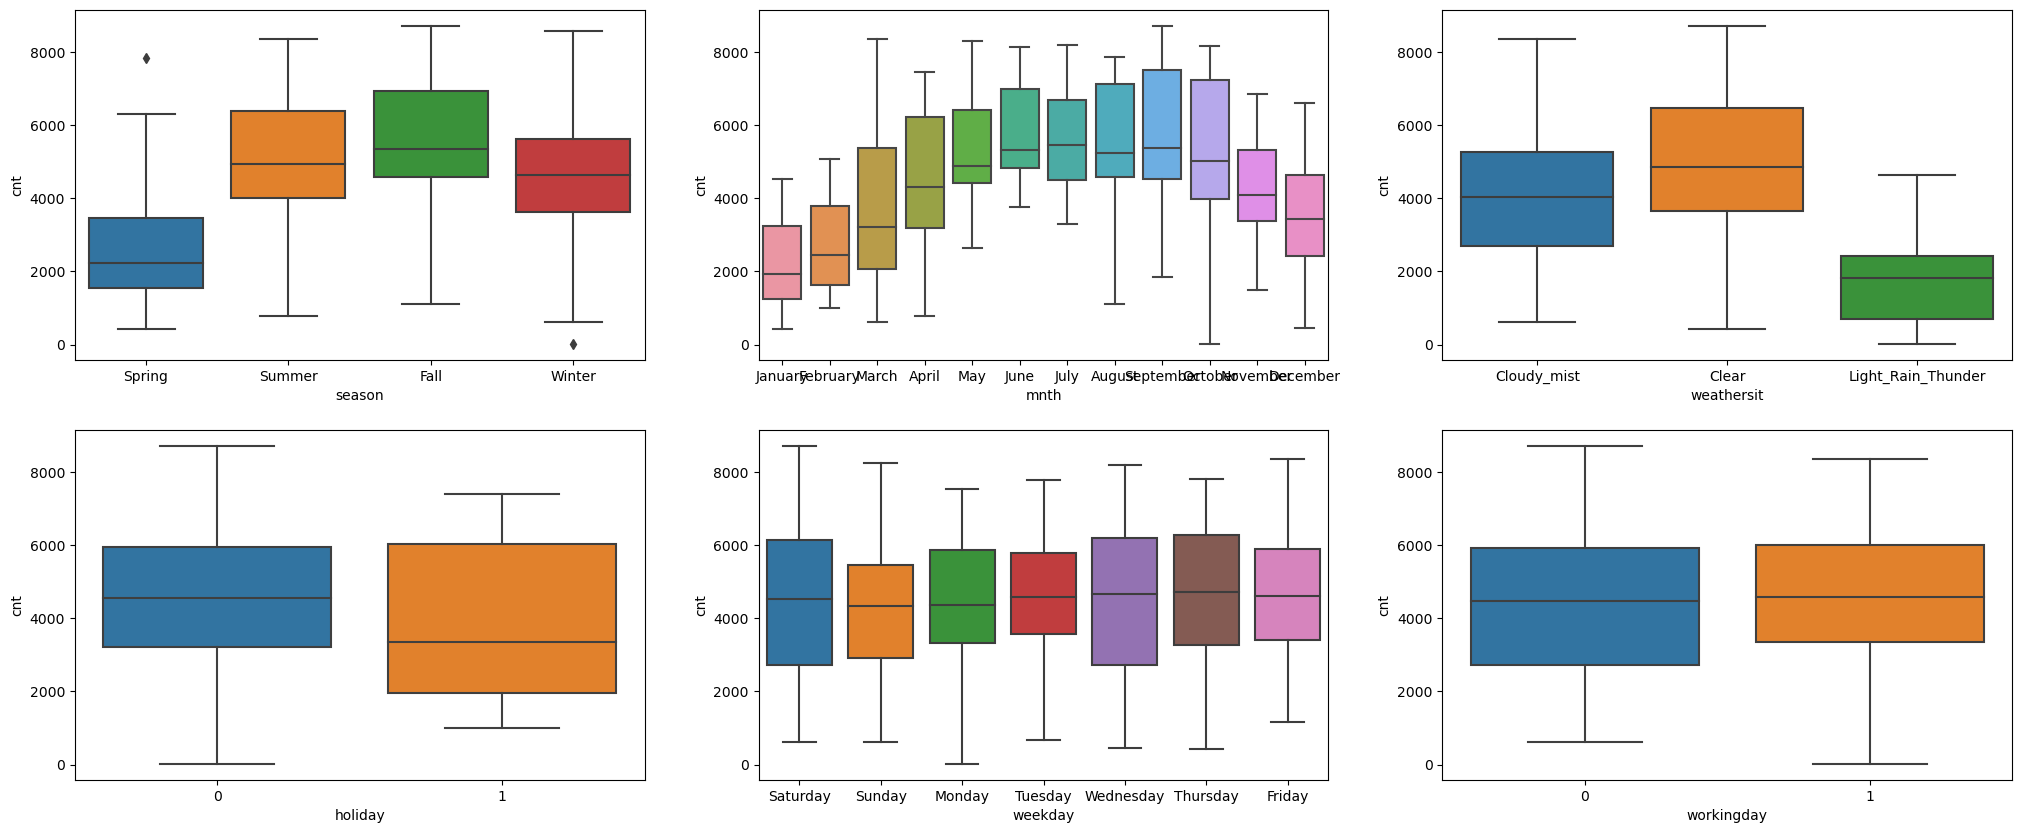

In [403]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

## Observation
1. Fall season the number of bike booking is more by looking at the distribution. Summer and Winter also has significant amount of booking. This can be a good predictor.
   Booking are happening with a median of more than 5000 .
2. Month can be a good predictor as each month has a significant amount of booking.May , Jun , July ,Aug , Sept bookings are happening with a median of more than 4000 .
3. Clear weathsit has more vistior due to which the bike hiring is happening with a median of more than 4000.


In [404]:
df.drop(columns = ['dteday'] , inplace =True)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    object 
 13  registered  730 non-null    object 
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 85.7+ KB


In [406]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,Spring,0,January,0,Saturday,0,Cloudy_mist,14.11,18.18,80.58,10.75,331,654,985
1,2,Spring,0,January,0,Sunday,0,Cloudy_mist,14.90,17.69,69.61,16.65,131,670,801
2,3,Spring,0,January,0,Monday,1,Clear,8.05,9.47,43.73,16.64,120,1229,1349
3,4,Spring,0,January,0,Tuesday,1,Clear,8.20,10.61,59.04,10.74,108,1454,1562
4,5,Spring,0,January,0,Wednesday,1,Clear,9.31,11.46,43.70,12.52,82,1518,1600


<Axes: >

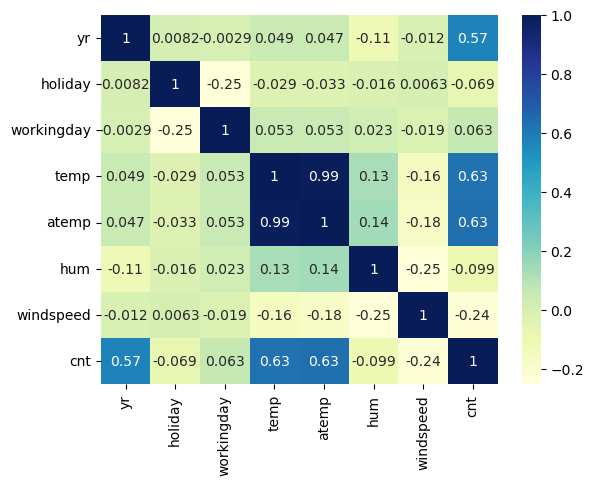

In [407]:
sns.heatmap(df.corr(numeric_only=True),cmap="YlGnBu",annot=True)

## Steps 2 :Preparing the data for modeling(train-test split , rescaling)

In [408]:
# creating idummy variables
season_dum = pd.get_dummies(df['season'],drop_first=True,dtype = int)
mnth_dum = pd.get_dummies(df['mnth'],drop_first=True,dtype = int)
weekday_dum = pd.get_dummies(df['weekday'],drop_first=True,dtype = int)
weathersit_dum = pd.get_dummies(df['weathersit'],drop_first=True,dtype = int)

In [409]:
df = pd.concat([df,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
df.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [410]:
## instant is just an auto generated id , whihc is not required for model builind
## casual , registered and cnt mostly define the same property . we need to remove the duplicate details
df.drop(columns=['instant','casual','registered','atemp'],inplace=True)

In [411]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,0,0,14.11,80.58,10.75,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.90,69.61,16.65,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.05,43.73,16.64,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,59.04,10.74,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.31,43.70,12.52,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [412]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.50,0.03,0.68,20.32,62.77,12.76,4508.01,0.25,0.25,0.24,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.14,0.14,0.14,0.14,0.14,0.14,0.34,0.03
std,0.50,0.17,0.47,7.51,14.24,5.20,1936.01,0.43,0.43,0.43,0.28,0.28,0.27,0.28,0.28,0.27,0.28,0.28,0.27,0.28,0.27,0.35,0.35,0.35,0.35,0.35,0.35,0.47,0.17
min,0.00,0.00,0.00,2.42,0.00,1.50,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,13.81,52.00,9.04,3169.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.50,0.00,1.00,20.47,62.62,12.13,4548.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,26.88,72.99,15.63,5966.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,35.33,97.25,34.00,8714.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [413]:
## Spliting data into train and test
df_train , df_test = train_test_split(df,train_size=0.7 , random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [414]:
## Rescaling of variables
scaler= MinMaxScaler()
num_columns = ['temp','hum','windspeed']
df_train[num_columns]

,temp,hum,windspeed
576,29.25,70.42,11.08
426,16.98,62.12,10.79
728,10.49,48.33,23.50
482,15.44,48.96,8.71
111,13.80,72.96,14.71
...,...,...,...
578,30.85,65.96,8.67
53,9.09,42.30,6.31
350,10.59,56.08,16.29
79,17.65,73.74,19.35


In [415]:
## Fit on data
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
576,1,0,1,0.82,0.73,0.26,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.44,0.64,0.26,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.25,0.50,0.66,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.40,0.50,0.19,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.35,0.75,0.38,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [416]:
df_train[num_columns].describe()

,temp,hum,windspeed
count,510.00,510.00,510.00
mean,0.54,0.65,0.32
std,0.23,0.15,0.17
min,0.00,0.00,0.00
25%,0.34,0.54,0.20
50%,0.54,0.65,0.30
75%,0.74,0.75,0.41
max,1.00,1.00,1.00


<Axes: >

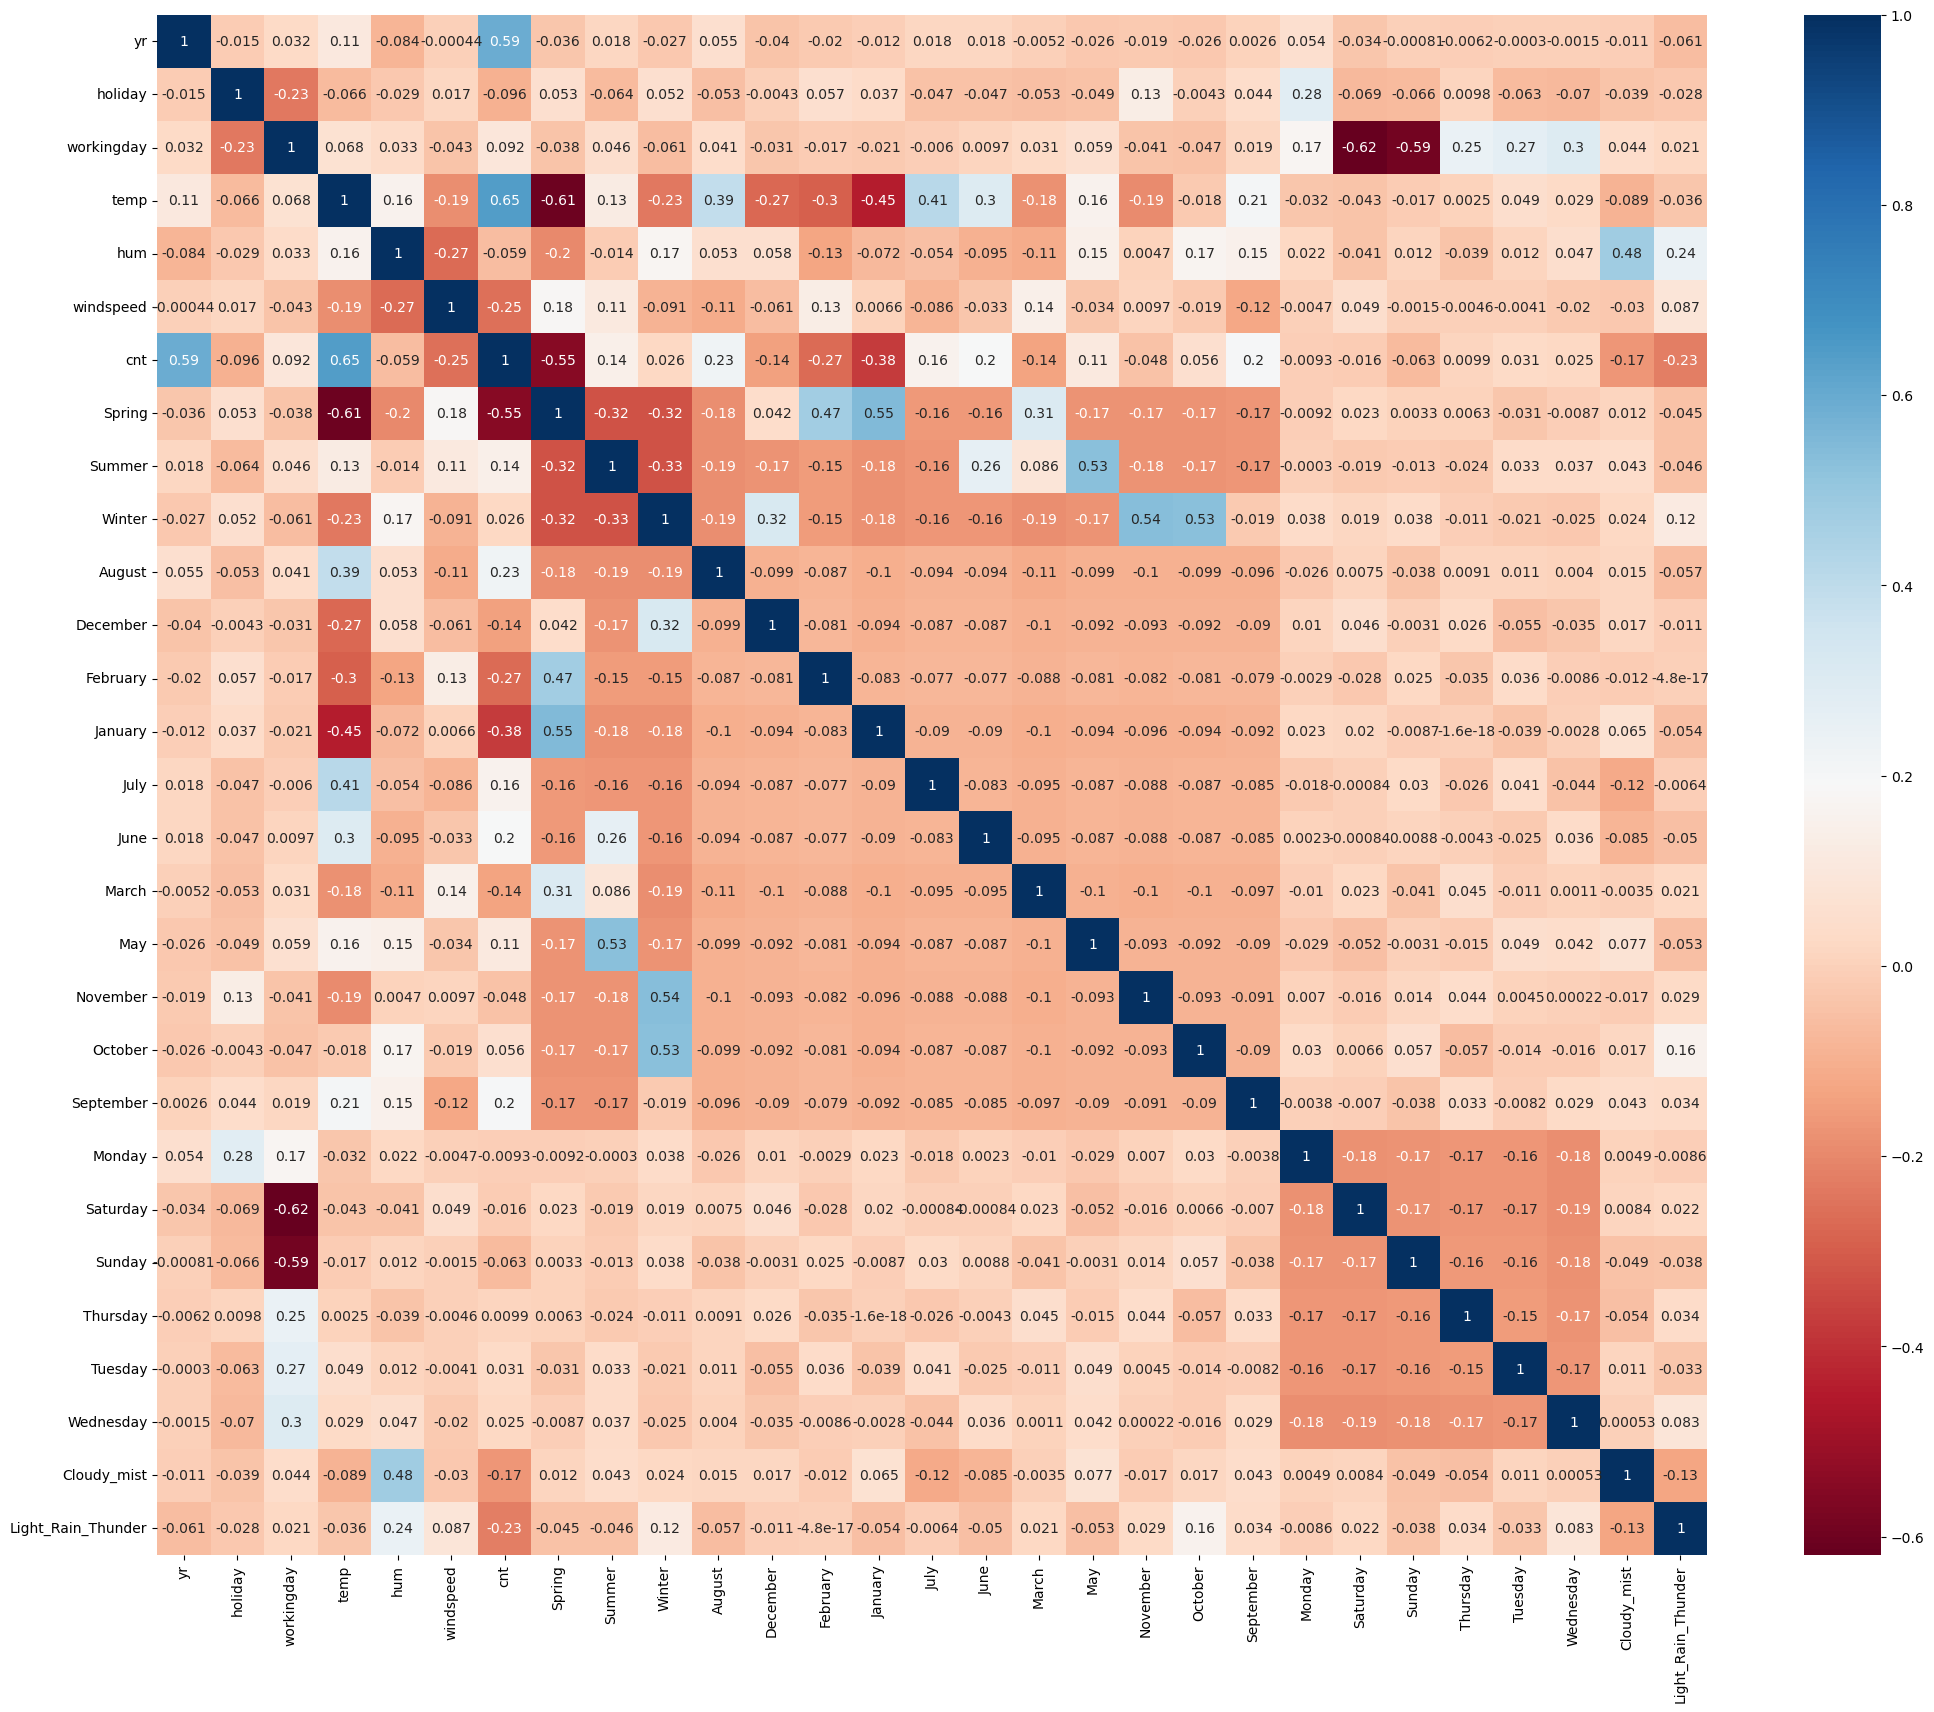

In [417]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot=True, cmap = 'RdBu')

#### We will be considering the bottom up approach , Considering all attribute to build model and then remove one by one based on the stats.

In [418]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
576,1,0,1,0.82,0.73,0.26,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.44,0.64,0.26,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.25,0.50,0.66,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.40,0.50,0.19,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.35,0.75,0.38,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [419]:
y_train = df_train.pop('cnt')
X_train = df_train

In [330]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
576,1,0,1,0.82,0.73,0.26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.44,0.64,0.26,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.25,0.50,0.66,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.40,0.50,0.19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.35,0.75,0.38,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [420]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  510 non-null    int64  
 1   holiday             510 non-null    int64  
 2   workingday          510 non-null    int64  
 3   temp                510 non-null    float64
 4   hum                 510 non-null    float64
 5   windspeed           510 non-null    float64
 6   Spring              510 non-null    int64  
 7   Summer              510 non-null    int64  
 8   Winter              510 non-null    int64  
 9   August              510 non-null    int64  
 10  December            510 non-null    int64  
 11  February            510 non-null    int64  
 12  January             510 non-null    int64  
 13  July                510 non-null    int64  
 14  June                510 non-null    int64  
 15  March               510 non-null    int64  
 16  May        

In [421]:
# Build model with all variables
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_lm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.00e-181
Time:                        10:19:30   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     482   BIC:                             8372.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2130.6795    306.769      6.946      0.000    1527.910    2733.449
yr                  2020.3471     70.106     28.819      0.000    1882.596    2158.098
holiday               91.6888    209.001      0.439      0.661    -318.977     502.355
workingday           840.3685    106.697      7.876      0.000     630.719    1050.018
temp                3871.0579    402.069      9.628      0.000    3081.034    4661.082
hum                -1316.6056    335.084     -3.929      0.000   -1975.011    -658.201
windspeed          -1616.8029    223.739     -7.226      0.000   -2056.426   -1177.179
Spring              -389.6974    260.487     -1.496      0.135    -901.528     122.133
Summer               373.7710    227.201      1.645      0.101     -72.655     820.197
Winter               935.5337    242.829      3.853      0.000     458.399    1412.668
August               177.1104    291.644      0.607      0.544    -395.941     750.162
December            -384.8529    292.271     -1.317      0.189    -959.135     189.430
February            -281.9792    286.316     -0.985      0.325    -844.561     280.603
January             -550.3311    291.912     -1.885      0.060   -1123.908      23.245
July                -294.2054    303.521     -0.969      0.333    -890.594     302.183
June                  40.0039    215.077      0.186      0.853    -382.600     462.608
March                 11.0761    213.557      0.052      0.959    -408.541     430.694
May                  214.4581    182.810      1.173      0.241    -144.744     573.661
November            -346.6284    316.293     -1.096      0.274    -968.112     274.855
October               65.5898    311.945      0.210      0.834    -547.351     678.530
September            746.9719    277.473      2.692      0.007     201.765    1292.179
Monday              -181.9322    133.308     -1.365      0.173    -443.869      80.005
Saturday             834.9522    119.369      6.995      0.000     600.404    1069.500
Sunday               363.6700    121.207      3.000      0.003     125.510     601.830
Thursday             -79.3632    135.075     -0.588      0.557    -344.773     186.046
Tuesday             -155.8567    134.823     -1.156      0.248    -420.770     109.056
Wednesday            -47.7634    129.663     -0.368      0.713    -302.538     207.011
Cloudy_mist         -517.6165     90.664     -5.709      0.000    -695.761    -339.472
Light_Rain_Thunder -2223.7163    229.263     -9.699      0.000   -2674.195   -1773.238
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):             

In [422]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.54
21,Saturday,19.71
22,Sunday,18.34
6,Spring,10.75
8,Winter,9.44
7,Summer,8.27
3,temp,7.08
17,November,6.79
18,October,6.47
9,August,6.36


## Look at the significance of variables by looking at the p value
## VIF , P 
    - HIGH vif LOW P - Drop
    - HIGH vif LOW P - Remove these after all others
    - LOW vif HIGH P - Drop , remodel the setup and check the VIF
    - LOW vif LOW P - Accept

In [423]:
## Use RFE to find out attributes need to be dropped
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(X_train, y_train)

In [424]:
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","status","Rank"])
rfe_table.sort_values(by="Rank",ascending=False)


,Feature,status,Rank
15,March,False,9
25,Wednesday,False,8
14,June,False,7
23,Thursday,False,6
24,Tuesday,False,5
20,Monday,False,4
18,October,False,3
9,August,False,2
26,Cloudy_mist,True,1
22,Sunday,True,1


In [425]:
supported_Col = X_train.columns[rfe.support_]
supported_Col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'December', 'February', 'January', 'July', 'May',
       'November', 'September', 'Saturday', 'Sunday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [426]:
not_supported_Col = X_train.columns[~rfe.support_]
not_supported_Col

Index(['August', 'June', 'March', 'October', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [427]:
## Model - 2 based on RFE outcome
X_train_rfe = X_train[supported_Col]

In [428]:
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,December,February,January,July,May,November,September,Saturday,Sunday,Cloudy_mist,Light_Rain_Thunder
576,1,0,1,0.82,0.73,0.26,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.44,0.64,0.26,1,0,0,0,0,0,0,0,0,0,1,0,1,0
728,1,0,0,0.25,0.50,0.66,1,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.40,0.50,0.19,0,1,0,0,0,0,0,0,0,0,1,0,1,0
111,0,0,1,0.35,0.75,0.38,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.86,0.68,0.19,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.20,0.44,0.11,1,0,0,0,1,0,0,0,0,0,0,0,0,0
350,0,0,0,0.25,0.58,0.43,0,0,1,1,0,0,0,0,0,0,1,0,1,0
79,0,0,1,0.46,0.76,0.53,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [429]:
# Build model with all variables
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          5.20e-189
Time:                        10:19:45   Log-Likelihood:                -4100.4
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     490   BIC:                             8325.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2168.6011    262.504      8.261      0.000    1652.830    2684.373
yr                  2014.7522     69.227     29.103      0.000    1878.733    2150.771
holiday                7.3869    188.880      0.039      0.969    -363.727     378.501
workingday           818.1484     86.171      9.494      0.000     648.838     987.459
temp                3934.4353    332.129     11.846      0.000    3281.862    4587.008
hum                -1336.8204    326.530     -4.094      0.000   -1978.391    -695.249
windspeed          -1627.6398    220.828     -7.371      0.000   -2061.527   -1193.753
Spring              -480.7476    190.184     -2.528      0.012    -854.424    -107.071
Summer               256.5098    146.839      1.747      0.081     -32.003     545.022
Winter               869.7971    154.814      5.618      0.000     565.616    1173.978
December            -423.7628    157.415     -2.692      0.007    -733.055    -114.471
February            -302.1470    185.824     -1.626      0.105    -667.257      62.963
January             -565.4005    184.340     -3.067      0.002    -927.596    -203.205
July                -443.6319    155.971     -2.844      0.005    -750.087    -137.177
May                  198.8114    150.043      1.325      0.186     -95.995     493.618
November            -400.4085    163.035     -2.456      0.014    -720.743     -80.074
September            628.4941    144.525      4.349      0.000     344.529     912.459
Saturday             908.1228    103.359      8.786      0.000     705.042    1111.204
Sunday               434.9429    107.591      4.043      0.000     223.546     646.340
Cloudy_mist         -506.9335     89.638     -5.655      0.000    -683.055    -330.812
Light_Rain_Thunder -2215.6609    226.718     -9.773      0.000   -2661.120   -1770.201
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                     1.45e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.23e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [430]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,60.98
16,Saturday,14.60
17,Sunday,13.91
6,Spring,5.79
3,temp,4.88
8,Winter,3.88
7,Summer,3.49
1,holiday,3.43
11,January,2.38
4,hum,1.97


In [431]:
## Removing variable workingday due to high VIF value and low P
X_train_rfe.drop(["workingday"], axis=1, inplace=True)


In [432]:
## Remodeled
X_train_sm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr1 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          5.20e-189
Time:                        10:19:53   Log-Likelihood:                -4100.4
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     490   BIC:                             8325.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2986.7495    321

In [433]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.82
2,temp,18.45
5,Spring,5.47
4,windspeed,4.86
7,Winter,4.09
6,Summer,3.35
10,January,2.38
17,Cloudy_mist,2.35
0,yr,2.11
9,February,1.92


In [434]:
## Removing hum due to high VIP and low p
X_train_rfe.drop(["hum"], axis=1, inplace=True)

In [435]:
## Remodeled
X_train_sm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr2 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.51e-186
Time:                        10:20:00   Log-Likelihood:                -4109.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     491   BIC:                             8336.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2357.8943    287

In [436]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.43
3,windspeed,4.80
4,Spring,4.37
6,Winter,3.04
5,Summer,2.81
9,January,2.21
0,yr,2.09
8,February,1.88
12,November,1.83
10,July,1.60


In [437]:
## Remove May due to high p values
X_train_rfe.drop(["May"], axis=1, inplace=True)

In [438]:
## Remodeled
X_train_sm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr3 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.63e-187
Time:                        10:20:05   Log-Likelihood:                -4109.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     492   BIC:                             8331.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2318.5237    283

In [439]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.31
3,windspeed,4.70
4,Spring,4.37
6,Winter,3.04
5,Summer,2.26
9,January,2.21
0,yr,2.08
8,February,1.88
11,November,1.83
10,July,1.60


In [440]:
## Remove Saturday due to high p value
X_train_rfe.drop(["Saturday"], axis=1, inplace=True)

In [441]:
## Remodeled
X_train_sm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr4 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.08e-188
Time:                        10:20:11   Log-Likelihood:                -4109.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     493   BIC:                             8326.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2339.7565    282

In [442]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.27
3,windspeed,4.68
4,Spring,4.34
6,Winter,3.03
5,Summer,2.25
9,January,2.21
0,yr,2.08
8,February,1.88
11,November,1.83
10,July,1.60


In [443]:
## Remove February due to high p values
X_train_rfe.drop(["February"], axis=1, inplace=True)

In [444]:
## Remodeled
X_train_sm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr5 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          6.39e-189
Time:                        10:20:17   Log-Likelihood:                -4111.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2227.2939    275

In [445]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.22
3,windspeed,4.67
6,Winter,2.98
4,Spring,2.92
5,Summer,2.25
0,yr,2.07
10,November,1.81
8,January,1.66
9,July,1.60
13,Cloudy_mist,1.57


In [446]:
## Remove November  due to high p values
X_train_rfe.drop(["November"], axis=1, inplace=True)

In [447]:
## Remodeled
X_train_sm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr6 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression model
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          4.79e-189
Time:                        10:20:22   Log-Likelihood:                -4113.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2075.3612    267

In [448]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.19
3,windspeed,4.62
4,Spring,2.91
5,Summer,2.25
6,Winter,2.09
0,yr,2.07
8,January,1.65
9,July,1.60
12,Cloudy_mist,1.57
10,September,1.34


In [449]:
## Remove December  due to high p values
X_train_rfe.drop(["December"], axis=1, inplace=True)

In [450]:
## Remodeled
X_train_sm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr7 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression model
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.91e-189
Time:                        10:20:27   Log-Likelihood:                -4115.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     496   BIC:                             8318.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1954.7763    260

In [451]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,4.62
4,Spring,2.78
5,Summer,2.25
0,yr,2.07
6,Winter,1.82
7,January,1.61
8,July,1.59
11,Cloudy_mist,1.57
9,September,1.34


In [452]:
## Remove December  due to high p values
X_train_rfe.drop(["January"], axis=1, inplace=True)

In [453]:
## Remodeled
X_train_sm = sm.add_constant(X_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr8 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression model
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.45e-189
Time:                        10:20:33   Log-Likelihood:                -4118.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     497   BIC:                             8317.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1812.8494    253

In [454]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,Summer,2.24
4,Spring,2.11
0,yr,2.07
6,Winter,1.81
7,July,1.59
10,Cloudy_mist,1.56
8,September,1.34
9,Sunday,1.18


## Step -3 Residual Analysis of the train data

In [455]:
X_train_sm = sm.add_constant(X_train_rfe)


In [456]:
Y_train_pred = lr8.predict(X_train_sm)


Text(0.5, 0, 'Errors')

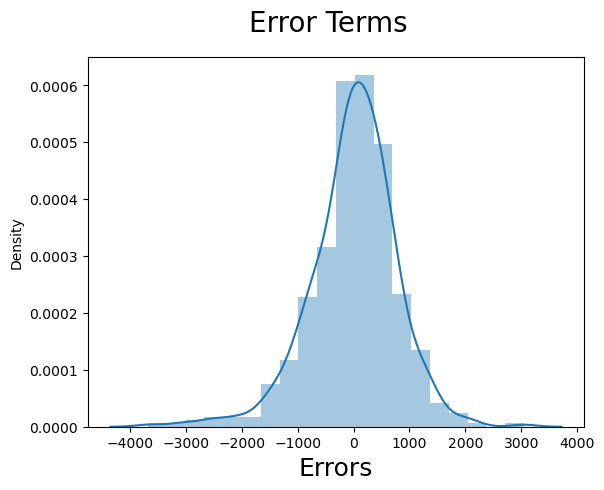

In [457]:
fig = plt.figure()
sns.distplot((y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

## Step 4 : Prediction and Evaluation on Test sets

In [458]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
184,0,1,0,29.79,63.79,5.46,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.08,59.21,7.63,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.27,81.29,13.25,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,0,0,1,31.43,42.42,13.42,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.32,30.50,19.58,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [459]:
num_columns = ['temp','hum','windspeed']
df_test[num_columns] = scaler.fit_transform(df_test[num_columns])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
184,0,1,0,0.84,0.53,0.15,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.91,0.47,0.23,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.50,0.78,0.44,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.89,0.24,0.45,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.82,0.07,0.68,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [460]:
y_test = df_test.pop('cnt')
X_test = df_test


In [461]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00
mean,0.48,0.04,0.70,0.55,0.51,0.42,0.25,0.26,0.24,0.06,0.09,0.10,0.08,0.10,0.10,0.05,0.09,0.07,0.09,0.09,0.13,0.12,0.15,0.16,0.17,0.10,0.32,0.03
std,0.50,0.19,0.46,0.25,0.20,0.19,0.44,0.44,0.43,0.24,0.28,0.30,0.27,0.31,0.29,0.23,0.28,0.26,0.28,0.28,0.33,0.32,0.35,0.37,0.37,0.30,0.47,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.33,0.36,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.55,0.49,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.76,0.65,0.52,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [462]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
184,1.00,0,1,0,0.84,0.53,0.15,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1.00,1,0,1,0.91,0.47,0.23,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,1.00,0,0,1,0.50,0.78,0.44,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,1.00,0,0,1,0.89,0.24,0.45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,1.00,0,0,1,0.82,0.07,0.68,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [463]:
X_test_sm_final = X_test_sm[['yr','holiday','temp','windspeed','Spring','Summer','Winter','July','September','Sunday','Cloudy_mist','Light_Rain_Thunder']]


In [464]:
X_test_sm_final.head()

,yr,holiday,temp,windspeed,Spring,Summer,Winter,July,September,Sunday,Cloudy_mist,Light_Rain_Thunder
184,0,1,0.84,0.15,0,0,0,1,0,0,1,0
535,1,0,0.91,0.23,0,1,0,0,0,0,0,0
299,0,0,0.50,0.44,0,0,1,0,0,0,1,0
221,0,0,0.89,0.45,0,0,0,0,0,0,0,0
152,0,0,0.82,0.68,0,1,0,0,0,0,0,0


In [465]:
X_test_sm_final = sm.add_constant(X_test_sm_final)


In [466]:
## Predict
y_test_pred_lr8 = lr8.predict(X_test_sm_final)


Text(0, 0.5, 'y_test_pred_lr8')

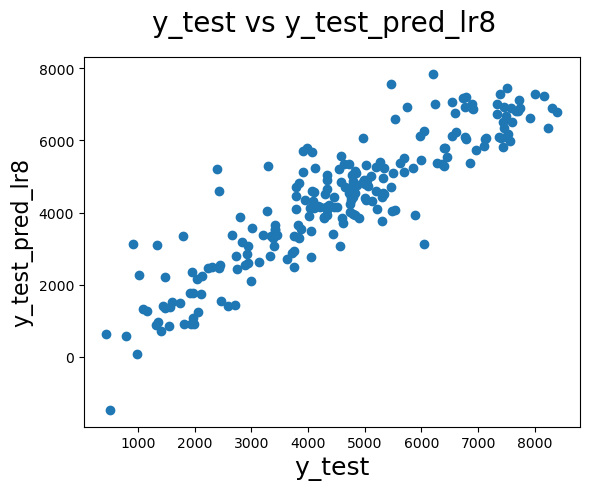

In [467]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred_lr8)
fig.suptitle('y_test vs y_test_pred_lr8', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred_lr8', fontsize = 16)

In [472]:
## Evaluate
rsquared_test = r2_score(y_test, y_test_pred_lr8)
rsquared_train = r2_score(y_train, Y_train_pred)
print("frsquared for test data {}",rsquared_test)
print("frsquared for train data {}",rsquared_train)


frsquared for test data {} 0.7905853036613633
frsquared for train data {} 0.8409034711793522


## Conculsion


In [473]:
lr8.params.to_frame()

,0
const,1812.85
yr,2029.34
holiday,-914.41
temp,4265.03
windspeed,-1285.15
Spring,-569.51
Summer,413.18
Winter,737.14
July,-427.95
September,660.70


## Major Predictor
- yr(Year)
    - Coefficient : 2029.34
    - Increase in year increase bike hiring by 2029.34
- temp(Temperature):
    - Coefficient : 4265.03
    - Increase in temp increase bike hiring by 4265.03
- windspeed
    - Coefficient : -1285.15
    - Increase in temp decreases bike hiring by  -1285.15
    

## The equation for Best Fitted Line

CNT = 1812.85 + 2029.34 * yr +4265.03 * temp - 914.41 * holiday - 1285.15 * windspeed - 569.51 * Spring + 413.18 * Summer - 737.14 * Winter - 427.95 * July + 660.70 * September - 420.22 *Sunday -714.46 * Cloudy_mist - 2516.27 * Light_Rain_Thunder